# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Important:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an overview of the Dandiset 001174, which contains calcium imaging data from the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. The data was acquired using miniature microscopes to study activity patterns of projection neurons in deep layers of the SMA and M1 during rest and an arm reaching task.

Link to the Dandiset: https://dandiarchive.org/dandiset/001174/0.250331.2218

This notebook will cover the following:
1.  Loading the Dandiset metadata using the DANDI API.
2.  Listing the assets (files) available in the Dandiset.
3.  Loading one of the NWB files in the Dandiset.
4.  Visualizing some data from the NWB file, including OnePhotonSeries data, fluorescence traces, and image masks.
5.  Summarizing findings and suggesting possible future directions for analysis.

### Required Packages
The following packages are required to run this notebook:
*   pynwb
*   h5py
*   remfile
*   matplotlib
*   numpy
*   seaborn

To install these packages, you can use pip:
```bash
pip install pynwb h5py remfile matplotlib numpy seaborn
```
It is assumed that these packages are already installed on your system.

### Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata['description']}")
print(f"Dandiset keywords: {metadata['keywords']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218
Dandiset description: The study of motor cortices in non-human primates is relevant to our understanding of human motor control, both in healthy conditions and in movement disorders. Calcium imaging and miniature microscopes allow the study of multiple genetically identified neurons with excellent spatial resolution. We used this method to examine activity patterns of projection neurons in deep layers of the supplementary motor (SMA) and primary motor areas (M1) in four rhesus macaques. We implanted gradient index lenses and expressed GCaMP6f to image calcium transients while the animals were at rest or engaged in an arm reaching task. We tracked the activity of SMA and M1 neurons across conditions, examined cell pairs for synchronous activity, and assessed whether SMA and M1 neuronal activation followed specific sequential activation patterns. We demonstrate th

### Loading an NWB file and showing some metadata

In this section, we will load one of the NWB files in the Dandiset and display some of its metadata. We will load the file "sub-Q/sub-Q_ophys.nwb", which has the asset ID "de07db56-e7f3-4809-9972-755c51598e8d".

We will also show how to get the URL for the asset.

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(nwb)
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

root pynwb.file.NWBFile at 0x140206135326608
Fields:
  acquisition: {
    OnePhotonSeries <class 'pynwb.ophys.OnePhotonSeries'>
  }
  devices: {
    Miniscope <class 'pynwb.device.Device'>
  }
  file_create_date: [datetime.datetime(2025, 1, 23, 15, 39, 28, 539904, tzinfo=tzlocal())]
  identifier: 5c2c4bb2-8310-4e0e-ae01-fd872edba928
  imaging_planes: {
    ImagingPlane <class 'pynwb.ophys.ImagingPlane'>
  }
  processing: {
    ophys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: Calcium imaging in SMA during the spontaneous condition
  session_start_time: 2022-09-15 13:16:33.129000+00:00
  subject: subject pynwb.file.Subject at 0x140201590951888
Fields:
  age: P5Y
  age__reference: birth
  sex: F
  species: Macaca mulatta
  subject_id: Q

  timestamps_reference_time: 2022-09-15 13:16:33.129000+00:00

Session description: Calcium imaging in SMA during the spontaneous condition
Identifier: 5c2c4bb2-8310-4e0e-ae01-fd872edba928
Session start time: 2022-09-15 13:16:33.1290

### Summarizing the contents of the NWB file

```
nwbfile.nwb
├── acquisition
│   └── OnePhotonSeries
├── devices
│   └── Miniscope
├── imaging_planes
│   └── ImagingPlane
├── processing
│   └── ophys
│       ├── EventAmplitude
│       ├── Fluorescence
│       │   └── RoiResponseSeries
│       └── ImageSegmentation
│           └── PlaneSegmentation
└── subject
```

Link to the NWB file on neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft

### Loading and visualizing OnePhotonSeries data

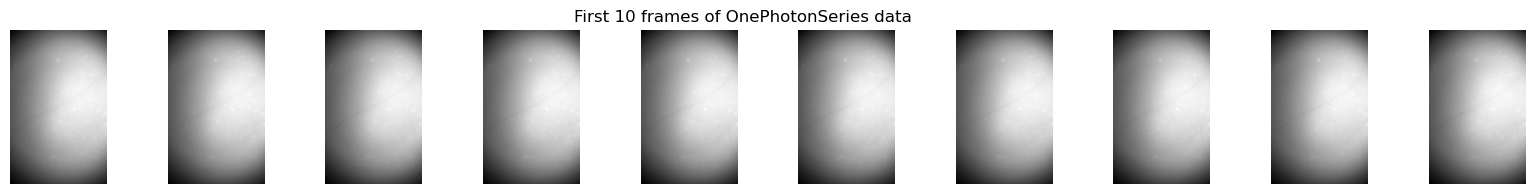

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# sns.set_theme() # Do not use seaborn styling for plotting images

# Get the OnePhotonSeries data
acquisition = nwb.acquisition
OnePhotonSeries = acquisition["OnePhotonSeries"]
data = OnePhotonSeries.data

# Plot the first 10 frames of the OnePhotonSeries data
num_frames = 10

# Load only the first 10 frames
first_ten_frames = data[:num_frames]

fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(first_ten_frames[i], cmap='gray')
    axes[i].axis('off')
plt.suptitle(f'First {num_frames} frames of OnePhotonSeries data')
plt.show()

The above plot shows the first 10 frames of the OnePhotonSeries data. These frames represent raw calcium imaging data acquired from the SMA and M1 regions of a macaque brain. The data shows variations in brightness and contrast, suggesting neuronal activity.

### Loading and visualizing fluorescence traces (RoiResponseSeries)

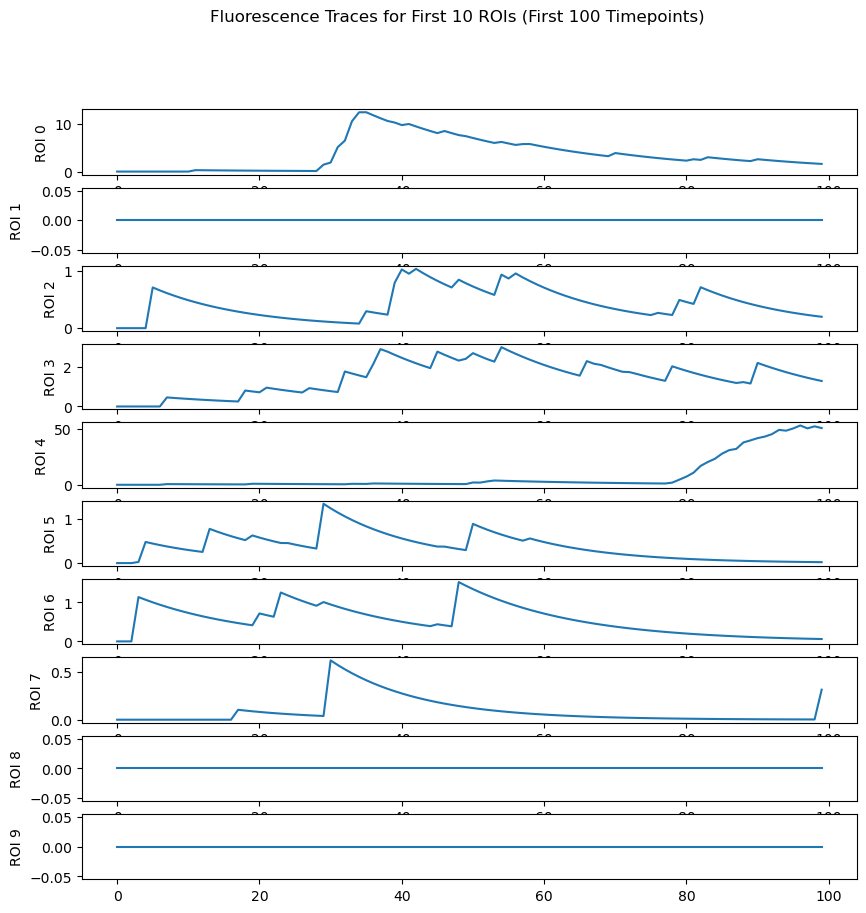

In [4]:
# Get the fluorescence data (RoiResponseSeries)
processing = nwb.processing
ophys = processing["ophys"]
data_interfaces = ophys.data_interfaces
Fluorescence = data_interfaces["Fluorescence"]
roi_response_series = Fluorescence.roi_response_series
RoiResponseSeries = roi_response_series["RoiResponseSeries"]
fluorescence_data = RoiResponseSeries.data

# Load only the first 100 timepoints for the first 10 ROIs
num_timepoints = 100
num_rois = 10
fluorescence_subset = fluorescence_data[:num_timepoints, :num_rois]

# Plot the fluorescence traces for the first 10 ROIs
fig, axes = plt.subplots(num_rois, 1, figsize=(10, 10))
for i in range(num_rois):
    axes[i].plot(fluorescence_subset[:, i])
    axes[i].set_ylabel(f'ROI {i}')
plt.suptitle(f'Fluorescence Traces for First {num_rois} ROIs (First {num_timepoints} Timepoints)')
plt.show()

The above plot shows the fluorescence traces for the first 10 ROIs. These traces represent the calcium signals from individual cells over time.

### Loading and visualizing image masks as a heatmap

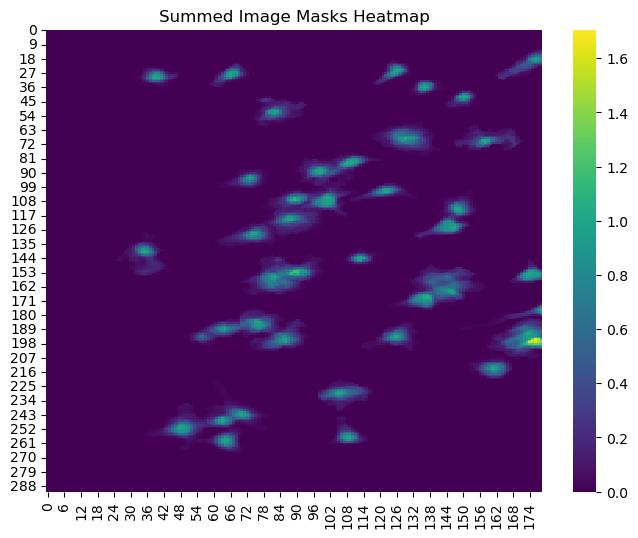

In [5]:
import seaborn as sns

# Get the image masks
processing = nwb.processing
ophys = processing["ophys"]
data_interfaces = ophys.data_interfaces
ImageSegmentation = data_interfaces["ImageSegmentation"]
plane_segmentations = ImageSegmentation["PlaneSegmentation"]
image_masks = plane_segmentations.image_mask

# Convert image masks to numpy array
image_masks_array = np.array([mask[:] for mask in image_masks])

# Sum the image masks along the first dimension
summed_image_masks = np.sum(image_masks_array, axis=0)

# Plot the summed image masks as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(summed_image_masks, cmap="viridis")
plt.title("Summed Image Masks Heatmap")
plt.show()

### Display metadata and column names of PlaneSegmentation

In [6]:
# Display some attributes of the nwb file
print(f"Experimenter: {nwb.experimenter}")
print(f"Experiment description: {nwb.experiment_description}")

# Display column names of PlaneSegmentation table
print(f"PlaneSegmentation column names: {plane_segmentations.colnames}")

Experimenter: None
Experiment description: None
PlaneSegmentation column names: ('image_mask',)


The image masks are visualized as a heatmap. The brighter the color, the more ROIs overlap in that region.

### Summarizing findings and suggesting possible future directions for analysis

In this notebook, we have demonstrated how to load and visualize data from Dandiset 001174, which contains calcium imaging data from the SMA and M1 regions of a macaque brain. We have shown how to load the Dandiset metadata using the DANDI API, list the assets available in the Dandiset, load one of the NWB files in the Dandiset, and visualize some data from the NWB file, including OnePhotonSeries data, fluorescence traces, and image masks.

Possible future directions for analysis include:
*   Exploring the relationship between neuronal activity (fluorescence traces) and behavior.
*   Identifying patterns of neuronal coactivation using the fluorescence traces.
*   Assessing whether SMA and M1 neuronal activation follows specific sequential activation patterns.
*   Investigating the event amplitudes and their relationship to the fluorescence traces.